## Relatório de Análise 7
Crie um DataFrame com a média dos valores por bairro. groupby()



In [15]:
import pandas as pd
df = pd.read_csv('dados/aluguel_residencial_2.csv', sep=';')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [16]:
bairro = ['Barra da Tijuca', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = df['Bairro'].isin(bairro)
df = df[selecao]
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
14,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
15,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
18,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento


In [17]:
grupo_bairro = df.groupby(by='Bairro')

In [18]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [25]:
for k, v in grupo_bairro:
    print(f'Bairro -> {k} | Média -> {round((v["Valor"].mean()),2)}')

Bairro -> Barra da Tijuca | Média -> 7069.55
Bairro -> Botafogo | Média -> 8791.83
Bairro -> Flamengo | Média -> 4113.53
Bairro -> Ipanema | Média -> 9352.0
Bairro -> Leblon | Média -> 8746.34
Bairro -> Tijuca | Média -> 2043.52


In [28]:
grupo_bairro[['Valor','Condominio','IPTU']].mean().round(2)

,Valor,Condominio,IPTU
Bairro,,,
Barra da Tijuca,7069.55,3591.01,1510.81
Botafogo,8791.83,976.28,260.39
Flamengo,4113.53,1102.15,292.77
Ipanema,9352.00,2244.44,759.94
Leblon,8746.34,2107.18,757.57
Tijuca,2043.52,711.69,173.82


Estatística Descritiva

In [36]:
grupo_bairro['Valor'].aggregate(['min','max','std']).rename(columns={'min':'Mínimo', 'max':'Máximo', 'std':'Desvio'})

,Mínimo,Máximo,Desvio
Bairro,,,
Barra da Tijuca,800.0,600000.0,11874.152437
Botafogo,700.0,4500000.0,152202.407611
Flamengo,800.0,35000.0,3839.125142
Ipanema,1200.0,90000.0,8219.718352
Leblon,100.0,100000.0,7004.042810
Tijuca,750.0,45000.0,1664.337667


In [37]:
import matplotlib as plt

In [46]:
plt.rc('figure', figsize= (20,10))


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

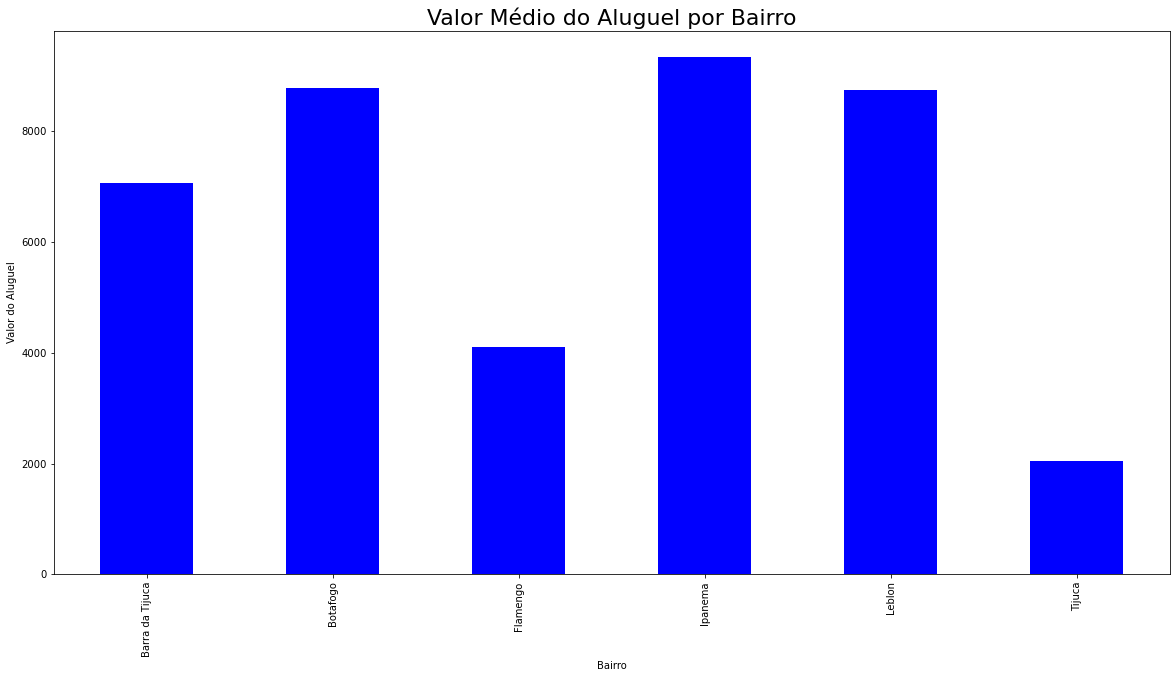

In [47]:
from turtle import color
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

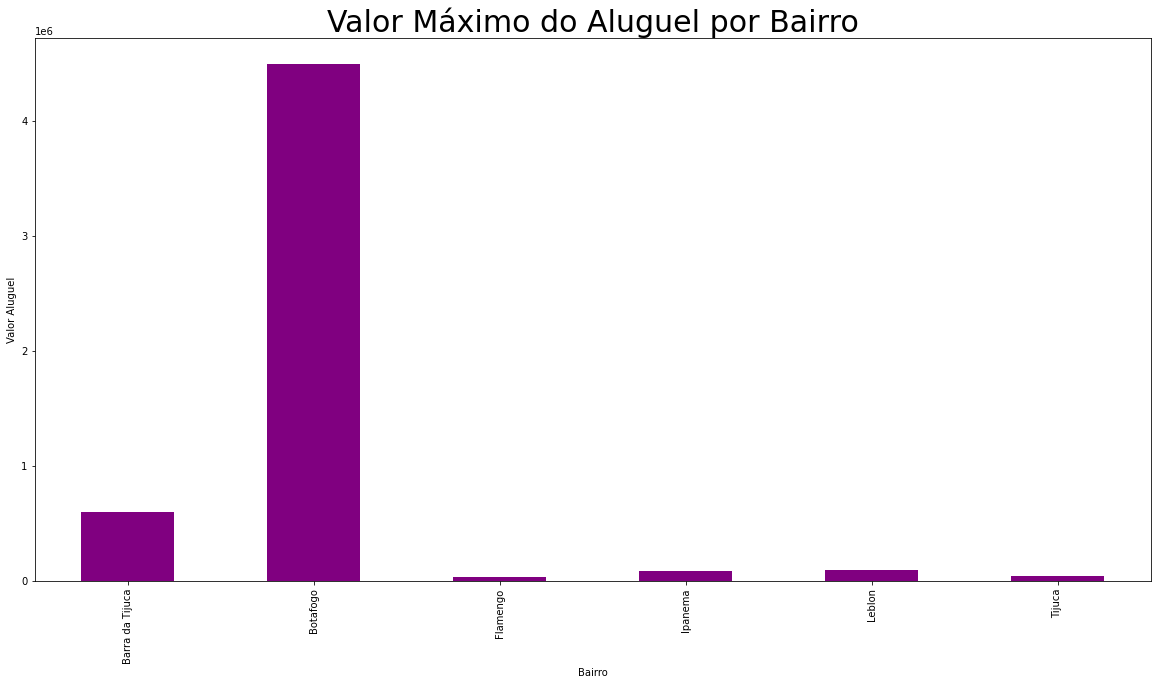

In [51]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'purple')
fig.set_ylabel('Valor Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize' : 30})